In [1]:
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
import sklearn
# sns.set_style('whitegrid')
# import seaborn as sns
import time
from pickle import load

import math
import os
from matplotlib.ticker import MultipleLocator
import matplotlib

In [2]:
k = 8
J = 32

# Load data # 

In [3]:
truth_weather = np.load("../../data/truth_run/weather_experiments/weather_array_longer.npy")

In [4]:
truth_weather.shape

(745, 700, 8)

In [5]:
truth_weather = truth_weather.transpose([0,2,1])

In [6]:
truth_weather.shape

(745, 8, 700)

In [7]:
poly_weather = np.load("../../data/simulation_runs/polynomial_param/weather_array_20.npy")

In [8]:
poly_weather.shape

(745, 40, 8, 700)

In [9]:
rnn_weather = np.load("../../data/simulation_runs/rnn/rnn_final/f_20_data/weather_array_long_700.npy")

In [10]:
rnn_weather.shape

(745, 40, 8, 700)

In [11]:
gan_weather = np.load("../../data/simulation_runs/gan_gagne/corrected_gans/weather_array_20.npy")

In [12]:
gan_weather.shape

(745, 40, 8, 700)

# Method #

In [13]:
poly_weather.shape

(745, 40, 8, 700)

In [14]:
truth_weather.shape

(745, 8, 700)

In [15]:
expectation_poly_x_tk = np.mean(poly_weather[:,:,:,:],axis=1)

In [16]:
expectation_poly_x_tk.shape

(745, 8, 700)

In [17]:
error_square = np.mean((expectation_poly_x_tk[:,:,:] - truth_weather[:,:,:])**2,axis=(0,1))

In [18]:
poly_error = error_square**0.5

In [19]:
expectation_rnn_x_tk = np.mean(rnn_weather[:,:,:,:],axis=1)

error_square = np.mean((expectation_rnn_x_tk[:,:,:] - truth_weather[:,:,:])**2,axis=(0,1))
    
rnn_error = error_square**0.5

In [20]:
expectation_gan_x_tk = np.mean(gan_weather[:,:,:,:],axis=1)

error_square = np.mean((expectation_gan_x_tk[:,:,:] - truth_weather[:,:,:])**2,axis=(0,1))
gan_error = error_square**0.5

In [21]:
poly_repeat = np.repeat(expectation_poly_x_tk[:,np.newaxis,:,:],40,axis=1)
poly_repeat.shape

(745, 40, 8, 700)

In [22]:
poly_weather.shape

(745, 40, 8, 700)

In [23]:
spread_square = np.mean((poly_weather - poly_repeat)**2,axis=(0,1,2))
poly_spread = spread_square**0.5

In [24]:
rnn_repeat = np.repeat(expectation_rnn_x_tk[:,np.newaxis,:,:],40,axis=1)

spread_square = np.mean((rnn_weather - rnn_repeat)**2,axis=(0,1,2))
rnn_spread = spread_square**0.5

In [25]:
gan_repeat = np.repeat(expectation_gan_x_tk[:,np.newaxis,:,:],40,axis=1)

spread_square = np.mean((gan_weather - gan_repeat)**2,axis=(0,1,2))
gan_spread = spread_square**0.5

In [26]:
from matplotlib.lines import Line2D
legend_elements = [
                    Line2D([0],[0],color="#e41a1c",lw=2,label="Polynomial Error"),
    Line2D([0],[0],color="#e41a1c",lw=2,label="Polynomial Spread",linestyle="dashed"),
                  Line2D([0],[0],color="#377eb8",lw=2,label="RNN Error"),
                      Line2D([0],[0],color="#377eb8",lw=2,label="RNN Spread",linestyle="dashed"),

                  Line2D([0],[0],color="#984ea3",lw=2,label="GAN Error"),
                  Line2D([0],[0],color="#984ea3",lw=2,label="GAN Spread",linestyle="dashed")]

#Line2D([0],[0],color="cyan",lw=2,label="RNN reset h")]

In [27]:
x_axis_new = np.arange(0,3.5,3.5/700)

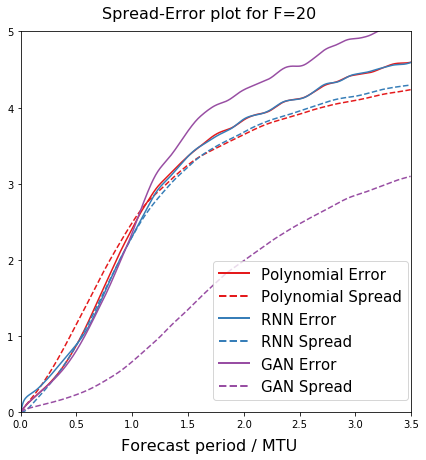

In [28]:
#x_axis = np.arange(0,400,1)

fig,ax = plt.subplots(figsize=(7,7))
plt.rcParams['font.size'] = '15'

fig.suptitle("Spread-Error plot for F=20",fontsize=16,y=0.93)


ax.plot(x_axis_new,poly_error,color="#e41a1c")
ax.plot(x_axis_new,poly_spread,linestyle="dashed",color="#e41a1c")
ax.plot(x_axis_new,rnn_error,color="#377eb8")
ax.plot(x_axis_new,rnn_spread,color="#377eb8",linestyle="dashed")
ax.plot(x_axis_new,gan_error,color="#984ea3")
ax.plot(x_axis_new,gan_spread,color="#984ea3",linestyle="dashed")

fig.legend(handles=legend_elements,loc=(0.5,0.13),prop={"size":15})
fig.text(0.5, 0.05, 'Forecast period / MTU', ha='center',fontsize="16")

ax.set_xlim([0,3.5])
ax.set_ylim([0,5])


plt.savefig("weather_plot.pdf",bbox_inches="tight")


plt.show()

